In [5]:
#variables
weights = 0
rtt = 0
scheduler = "rtt"
different_start = 1
gap = 4

In [ ]:
#paths
weights_file = "/App/output/train_0/weights_55168_steps.h5"

In [7]:
def setParameters(weights_par, rtt_par, scheduler_par, differnt_start_par, gap_par):
    global weights
    global rtt
    global scheduler
    global differnt_start
    global gap
    
    weights = weights_par
    rtt = rtt_par
    scheduler = scheduler_par
    differnt_start = differnt_start_par
    gap = gap_par

In [8]:
setParameters(0, 10, "rtt", 1, 4)

## Initial test


### RTT scheduler

In [11]:
%%bash -s $scheduler $rtt

cd /App/mininettest/ && python3 /App/mininettest/legacyschtest.py --scheduler $1 --rtt $2 --background-tcp
#time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
#echo $(bc <<< "scale=2; 2*1024*1024*8/$time") 
#cat /App/logs/server.logs
bash /App/mininettest/scripts/create_packets.bash
python3 /App/mininettest/create_fairness_figure.py
cat /App/logs/tcp_packets.logs
cat /App/logs/mpquic_packets_timesize.logs

tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on client-eth1, link-type EN10MB (Ethernet), capture size 262144 bytes
19:54:01.625413 IP 10.0.0.20.80 > 10.0.0.2.53338: Flags [S.], seq 659665285, ack 734788663, win 65160, options [mss 1460,sackOK,TS val 1258429176 ecr 2853207385,nop,wscale 7], length 0
19:54:01.635598 IP 10.0.0.20.80 > 10.0.0.2.53338: Flags [.], ack 79, win 509, options [nop,nop,TS val 1258429187 ecr 2853207407], length 0
19:54:01.636167 IP 10.0.0.20.80 > 10.0.0.2.53338: Flags [P.], seq 1:18, ack 79, win 509, options [nop,nop,TS val 1258429187 ecr 2853207407], length 17: HTTP: HTTP/1.0 200 OK
19:54:01.636300 IP 10.0.0.20.80 > 10.0.0.2.53338: Flags [P.], seq 18:2914, ack 79, win 509, options [nop,nop,TS val 1258429187 ecr 2853207407], length 2896: HTTP
19:54:01.636314 IP 10.0.0.20.80 > 10.0.0.2.53338: Flags [P.], seq 2914:5810, ack 79, win 509, options [nop,nop,TS val 1258429187 ecr 2853207407], length 2896: HTTP
19:54:01.640521 IP 1

*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/legacyschtest.py", line 98, in <module>
    do_training(args.sch, args.rtt, args.tcp_background, args.dif_start,args.gap)
  File "/App/mininettest/legacyschtest.py", line 84, in do_training
    exec_test(server_cmd, rtt, tcp_b, dif_start, gap)
  File "/App/mininettest/legacyschtest.py", line 72, in exec_test
    network.stop()
  File "/usr/local/lib/python3.8/dist-packages/mininet/net.py", line 575, in stop
    link.stop()
  File "/usr/local/lib/python3.8/dist-packages/mininet/link.py", line 507, in stop
    self.delete()
  File "/usr/local/lib/python3.8/dist-packages/mininet/link.py", line 502, in delete
    self.intf2.delete()
  File "/usr/local/lib/python3.8/dist-packages/mininet/link.py", line 203, in delete
    self.cmd( 'ip link del ' + self.name )
  File "/usr/local/lib/python3.8/dist-packages/mininet/link.py", line 65, in cmd
    return self.node

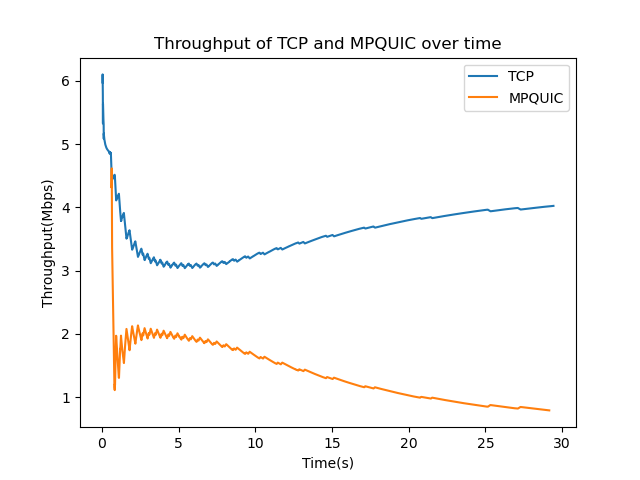

In [12]:
import IPython
IPython.display.Image("/App/output/tcp_mpquic.png")

In [ ]:
setParameters(0, 10, "rtt", 1, 4)

In [20]:
%%bash -s $different_start $gap $scheduler $rtt

mn -c
cd /App/mininettest/ && python3 /App/mininettest/legacyschtest.py --different-start $1 --gap $2 --scheduler $3 --rtt $4 --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $(bc <<< "scale=2; 2*1024*1024*8/$time") 
cat /App/logs/server.logs

bash /App/mininettest/scripts/create_packets.bash
python3 /App/mininettest/create_fairness_figure.py

559.24
Serving new connection: 30aaf67c34c17e0f, version 512 from 10.0.0.1:44932
GET 10.0.0.20:6121/test3
Responding with 200
Closing session with error: InternalError: write udp 10.0.0.1:36205->10.0.0.20:6121: sendto: network is unreachable


*** Removing excess controllers/ofprotocols/ofdatapaths/pings/noxes
killall controller ofprotocol ofdatapath ping nox_corelt-nox_core ovs-openflowd ovs-controllerovs-testcontroller udpbwtest mnexec ivs ryu-manager 2> /dev/null
killall -9 controller ofprotocol ofdatapath ping nox_corelt-nox_core ovs-openflowd ovs-controllerovs-testcontroller udpbwtest mnexec ivs ryu-manager 2> /dev/null
pkill -9 -f "sudo mnexec"
*** Removing junk from /tmp
rm -f /tmp/vconn* /tmp/vlogs* /tmp/*.out /tmp/*.log
*** Removing old X11 tunnels
*** Removing excess kernel datapaths
ps ax | egrep -o 'dp[0-9]+' | sed 's/dp/nl:/'
***  Removing OVS datapaths
ovs-vsctl --timeout=1 list-br
ovs-vsctl --if-exists del-br s1
ovs-vsctl --timeout=1 list-br
*** Removing all links of the pattern foo-ethX
ip link show | egrep -o '([-_.[:alnum:]]+-eth[[:digit:]]+)'
ip link show
*** Killing stale mininet node processes
pkill -9 -f mininet:
*** Shutting down stale tunnels
pkill -9 -f Tunnel=Ethernet
pkill -9 -f .ssh/mn
rm -f ~/.ss

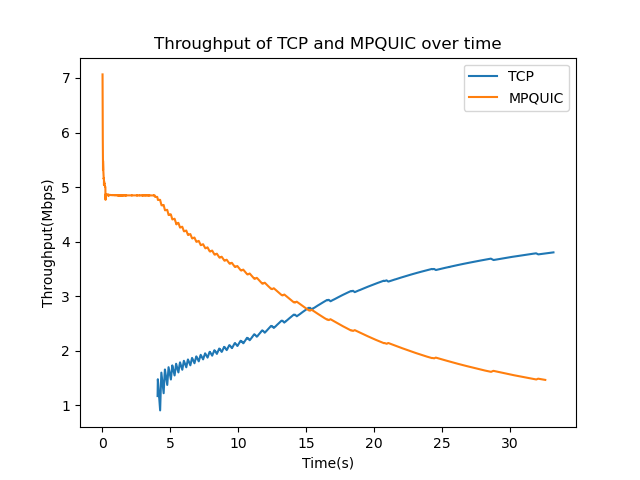

In [14]:
import IPython
IPython.display.Image("/App/output/tcp_mpquic.png")

In [21]:
setParameters(0, 10, "rtt", 2, 4)

In [22]:
%%bash $different_start $gap $scheduler $rtt

mn -c
cd /App/mininettest/ && python3 /App/mininettest/legacyschtest.py --different-start $1 --gap $2 --scheduler $3 --rtt $4 --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $(bc <<< "scale=2; 2*1024*1024*8/$time") 
cat /App/logs/server.logs

bash: 1: No such file or directory


CalledProcessError: Command 'b'\nmn -c\ncd /App/mininettest/ && python3 /App/mininettest/legacyschtest.py --different-start $1 --gap $2 --scheduler $3 --rtt $4 --background-tcp\ntime=$(tail -1 /App/logs/client.logs | awk \'{print $3}\')\necho $(bc <<< "scale=2; 2*1024*1024*8/$time") \ncat /App/logs/server.logs\n'' returned non-zero exit status 127.

In [ ]:
!bash /App/mininettest/scripts/create_packets.bash
!python3 /App/mininettest/create_fairness_figure.py

In [ ]:
import IPython
IPython.display.Image("/App/output/tcp_mpquic.png")

## Trained DQNAgent

In [29]:
setParameters(0, 10, "rtt", 1, 4)
rtt

10

In [28]:
%%bash -s $weights_file $rtt

mn -c
cd /App/mininettest/ && python3 /App/mininettest/congestiontest.py --weight_file $1 --rtt $2 --valid_congestion 0 --background-tcp
bash /App/mininettest/scripts/create_packets.bash
python3 /App/mininettest/create_fairness_figure.py
wc /App/logs/mpquic_packets_timesize.logs
wc /App/logs/tcp_packets_timesize.logs

 2208  4416 46238 /App/logs/mpquic_packets_timesize.logs
  5382  10764 113020 /App/logs/tcp_packets_timesize.logs


*** Removing excess controllers/ofprotocols/ofdatapaths/pings/noxes
killall controller ofprotocol ofdatapath ping nox_corelt-nox_core ovs-openflowd ovs-controllerovs-testcontroller udpbwtest mnexec ivs ryu-manager 2> /dev/null
killall -9 controller ofprotocol ofdatapath ping nox_corelt-nox_core ovs-openflowd ovs-controllerovs-testcontroller udpbwtest mnexec ivs ryu-manager 2> /dev/null
pkill -9 -f "sudo mnexec"
*** Removing junk from /tmp
rm -f /tmp/vconn* /tmp/vlogs* /tmp/*.out /tmp/*.log
*** Removing old X11 tunnels
*** Removing excess kernel datapaths
ps ax | egrep -o 'dp[0-9]+' | sed 's/dp/nl:/'
***  Removing OVS datapaths
ovs-vsctl --timeout=1 list-br
ovs-vsctl --if-exists del-br s1
ovs-vsctl --timeout=1 list-br
*** Removing all links of the pattern foo-ethX
ip link show | egrep -o '([-_.[:alnum:]]+-eth[[:digit:]]+)'
ip link show
*** Killing stale mininet node processes
pkill -9 -f mininet:
*** Shutting down stale tunnels
pkill -9 -f Tunnel=Ethernet
pkill -9 -f .ssh/mn
rm -f ~/.ss

In [ ]:
import IPython
IPython.display.Image("/App/output/tcp_mpquic.png")

In [ ]:
setParameters(0, 10, "rtt", 1, 4)

In [30]:
%%bash -s $different_start $gap $weights_file $scheduler $rtt

mn -c
cd /App/mininettest/ && python3 /App/mininettest/congestiontest.py --different-start $1 --gap $2 --weight_file $3 --rtt $4 --valid_congestion 0 --background-tcp
bash /App/mininettest/scripts/create_packets.bash
python3 /App/mininettest/create_fairness_figure.py

*** Removing excess controllers/ofprotocols/ofdatapaths/pings/noxes
killall controller ofprotocol ofdatapath ping nox_corelt-nox_core ovs-openflowd ovs-controllerovs-testcontroller udpbwtest mnexec ivs ryu-manager 2> /dev/null
killall -9 controller ofprotocol ofdatapath ping nox_corelt-nox_core ovs-openflowd ovs-controllerovs-testcontroller udpbwtest mnexec ivs ryu-manager 2> /dev/null
pkill -9 -f "sudo mnexec"
*** Removing junk from /tmp
rm -f /tmp/vconn* /tmp/vlogs* /tmp/*.out /tmp/*.log
*** Removing old X11 tunnels
*** Removing excess kernel datapaths
ps ax | egrep -o 'dp[0-9]+' | sed 's/dp/nl:/'
***  Removing OVS datapaths
ovs-vsctl --timeout=1 list-br
ovs-vsctl --timeout=1 list-br
*** Removing all links of the pattern foo-ethX
ip link show | egrep -o '([-_.[:alnum:]]+-eth[[:digit:]]+)'
ip link show
*** Killing stale mininet node processes
pkill -9 -f mininet:
*** Shutting down stale tunnels
pkill -9 -f Tunnel=Ethernet
pkill -9 -f .ssh/mn
rm -f ~/.ssh/mn/*
*** Cleanup complete.
usa

In [ ]:
import IPython
IPython.display.Image("/App/output/tcp_mpquic.png")

In [ ]:
setParameters(0, 10, "rtt", 2, 4)

In [ ]:
%%bash -s $different_start $gap $weights_file $scheduler $rtt

mn -c
cd /App/mininettest/ && python3 /App/mininettest/congestiontest.py --different-start $1 --gap $2 --weight_file $3 --rtt $4 --valid_congestion 0 --background-tcp
bash /App/mininettest/scripts/create_packets.bash
python3 /App/mininettest/create_fairness_figure.py

In [ ]:
import IPython
IPython.display.Image("/App/output/tcp_mpquic.png")

## Comparison

In [ ]:
%%bash
rm /App/logs/client.logs
echo 24050 > /App/output/train_10/validate_24050.csv
for i in $(seq 1 200)
do
mn -c
cd /App/mininettest/ && python /App/mininettest/congestiontest.py --weight_file /App/output/train_0/weights_24050_steps.h5f --rtt 10 --valid_congestion 0 --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/train_10/validate_24050.csv
done

In [ ]:
%%bash
rm /App/logs/client.logs
echo 0 > /App/output/train_10/validate_rtt.csv
for i in $(seq 1 200)
do
mn -c
cd /App/mininettest/ && python /App/mininettest/legacyschtest.py --scheduler rtt --rtt 10  --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/train_10/validate_rtt.csv
done

In [ ]:
import pandas


rtt_sch = pandas.read_csv("/App/output/train_10/validate_rtt.csv")

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(20, 7)


(2*8 * 1024 * 1024 / rtt_sch).plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Steps")
plt.title("Throughput per delay with agent")

In [ ]:
rtt_24050= pandas.read_csv("/App/output/train_10/validate_24050.csv")
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(20, 7)
(2*8 * 1024 * 1024 / rtt_24050).plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Steps")
plt.title("Throughput per delay with agent")

In [ ]:
(2*8 * 1024 * 1024 / rtt_24050).median()

In [ ]:
(2*8 * 1024 * 1024 / rtt_24050).mean()

In [ ]:
(2*8 * 1024 * 1024 / rtt_sch).median()

In [ ]:
(2*8 * 1024 * 1024 / rtt_sch).mean()